<a href="https://colab.research.google.com/github/heokwon/Algorithm_Study/blob/main/Do_it!/4)%EC%8A%A4%ED%83%9D%EA%B3%BC_%ED%81%90_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 큐(queue) 란?
큐는 스택과 같이 데이터를 임시 저장하는 자료구조이다. 하지만, 스택처럼 가장 나중에 넣은 데이터를 가장 먼저 꺼내지 않는다.

## 큐 알아보기
큐는 가장 먼저 넣은 데이터를 가장 먼저 꺼내는 선입선출(FIFO)구조이다.
예를 들어 은행 창구에서 차례를 기다리거나 마트에서 계산을 기다리는 줄을 생각하면 된다.

큐에 데이터를 추가하는 작업을 인큐(enqueue), 데이터를 꺼내는 작업을 디큐(dequeue)라고 한다. 또 데이터를 꺼내는 쪽을 프런트(front), 데이터를 넣은 쪽을 리어(rear)라고 한다

## 배열로 큐 구현하기
스택과 마찬가지로 큐 또한 배열을 사용하여 구현할 수 있다.<br>

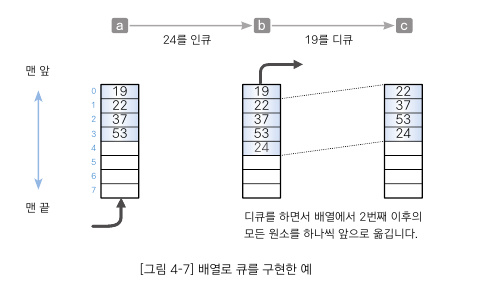<br>

배열의 맨 앞부터 순서대로 4개의 데이터 19, 22, 37, 53이 들어 있다.
배열 이름을 que라 하면 que[0] ~ que[3]까지 int형 데이터가 저장된다.(인덱스0인 원소가 que의 첫 번째 원소) 이 상태에서 데이터 24를 인큐하고 19를 디큐하는 과정을 알아보자
* 24를 인큐하기
  + 데이터 24를 인큐한다. 맨 끝 데이터가 저장되어 있는 que[3]의 다음 원소인 que[4]에 24를 저장
  + 이때 처리의 복잡도는 O(1)이고 비교적 적은 비용으로 구현가능
* 19를 디큐하기
  + 다음으로 데이터 19를 디큐한다. que[0]에 저장되어 있는 19를 꺼내면서 2번째 이후의 모든 원소를 앞쪽으로 옮겨야 한다.
  + 이 때 처리의 복잡도는 O(n)이다. 데이터를 꺼낼 때마다 이런 처리 작업을 수행해야 한다면 프로그램의 효율성을 기대할 수 없다.

### 보충) 우선순위 큐
우선순위 큐 (priority queue) : 인큐할 떄는 데이터에 우선순위를 부여하여 추가하고, 디큐할 때 우선순위가 가장 높은 데이터를 꺼내는 방식이다.

파이썬에서 우선순위를 부여하는 큐는 heapq모듈에서 제공한다. heap에서 data의 인큐는 heapq.heappush(heap, data)로 수행하고, 디큐는 heapq.heappop(heap)으로 수행한다.

## 링 버퍼로 큐 구현하기
링 버퍼(ring buffer) : 디큐할 때 배열 안의 원소를 옮기지 않는 큐

링 버퍼는 배열 맨 끝의 원소 뒤에 맨 앞의 원소가 연결되는 자료구조이다. 어떤 원소가 맨 앞 원소이고, 어떤 원소가 맨 끝 원소인지 식별하는 변수가 각각 front와 rear이다.

여기에서 프런트와 리어는 논리적인 데이터 순서일 뿐 배열의 물리적 원소의 순서는 아니다.
* front : 맨 앞 원소의 인덱스
* rear : 맨 끝 원소 바로 뒤의 인덱스(다음 인큐되는 데이터가 저장되는 위치)

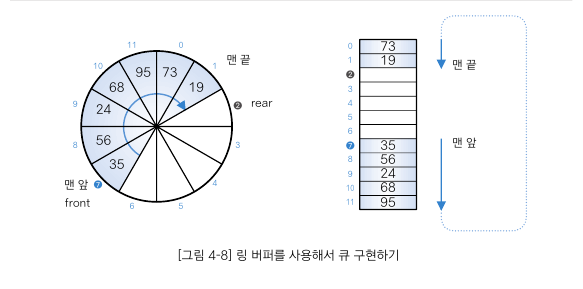<br>
<br><br>

인큐와 디큐를 수행하면 front와 rear의 값은 변한다.

* **(a)** 7개의 데이터 35, 56, 24, 68, 95, 73, 19가 늘어선 순서대로 que[7], que[8], ..., que[11], que[0], que[1]에 저장된다. front값은 7이고 rear값은 2 이다.
* **(b)** 그림 4-9의 **(a)**에서 82를 인큐한 다음의 상태이다. 맨 끝의 다음에 위치한 que[rear], 즉 que[2]에 82를 저장하고 rear값을 1 증가시켜 3으로 만든다.
* **(c)** 그림 4-9의 b에서 35를 디큐한 다음의 상태이다. 맨 앞 원소인 que[front], 즉 que[7]의 값인 35를 꺼내고 front값을 1 증가시켜 8로 만든다.<br>

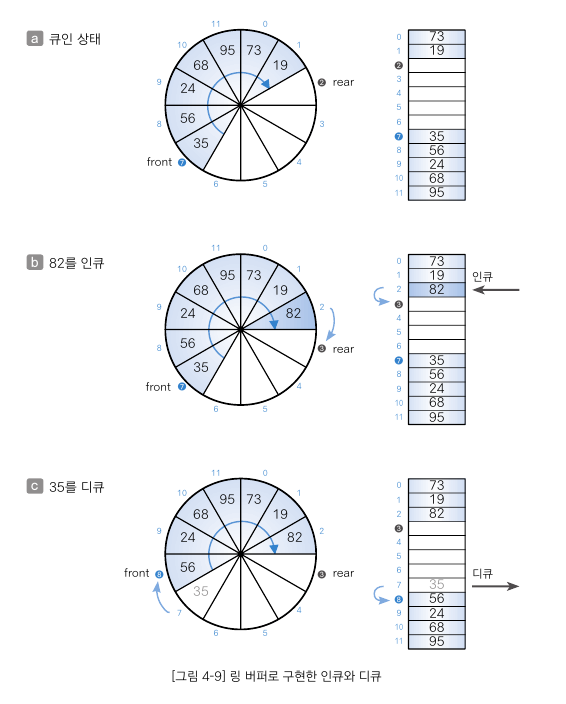<br>
<br><br>

그림 4-9와 같이 링 버퍼로 큐를 구현하면 원소를 옮길 필요 없이 front와 rear의 값을 업데이트하는 것만으로 인큐와 디큐를 수행할 수 있다. 모든 처리의 복잡도는 O(1)이다.<br>
<br>

* 예외 처리 크래스 Empty와 Full
  + 비어 있는 큐에 deque(), peek() 함수롤 호출할 때 내보내는 예외 처리는 Empty 클래스이고, 가득 차 있는 큐에 enque()함수를 호출할 때 내보내는 예외 처리는 Full클래스이다.
  

In [3]:
# 실습 4-3[A]
# 고정 길이 큐 클래스 FixedQueue 구현하기
# fixed_queue.py 저장

from typing import Any

class FixedQueue:

      class Empty(Exception):
          """비어 있는 FixedQueue에서 디큐 또는 피크할 때 내보내는 예외 처리"""
          pass

      class Full(Exception):
          """가득 차 있는 FixedQueue에서 인큐할 때 내보내는 예외 처리"""
          pass

      def __init__(self, capacity: int) -> None:
          """큐 초기화"""
          self.no = 0                     # 현재 데이터 개수
          self.front = 0                  # 맨 앞 원소 커서
          self.rear = 0                   # 맨 끝 원소 커서
          self.capacity = capacity        # 큐의 크기
          self.que = [None] * capacity    # 큐의 본체

      def __len__(self) -> int:
          """큐에 있는 모든 데이터 개수를 반환"""
          return self.no

      def is_empty(self) -> bool:
          """큐가 비어 있는지 판단"""
          return self.no <= 0

      def is_full(self) -> bool:
          """큐가 가득 차 있는지 판단"""
          return self.no >= self.capacity

# 실습 4-3[B]
      def enque(self, x: Any) -> None:
          """데이터 x를 인큐"""
          if self.is_full():
              raise FixedQueue.Full   # 큐가 가득 차 있는 경우 예외 처리 발생
          self.que[self.rear] = x
          self.rear += 1
          self.no += 1
          if self.rear == self.capacity:
              self.rear = 0

# 실습 4-3[C]
      def deque(self) -> Any:
          """데이터를 디큐"""
          if self.is_empty:
              raise FixedQueue.Empty  # 큐가 비어 있는 경우 예외 처리 발생
          x = self.que[self.front]
          self.front += 1
          self.no += 1
          if self.front == self.capacity:
              self.front = 0
          return x

# 실습 4-3[D]
      def peek(self) -> Any:
          """큐에서 데이터를 피크(맨 앞 데이터를 들여다봄)"""
          if self.is_empty():
              raise FixedQueue.Empty             # 큐가 비어있는 경우 예외 처리를 발생
          return self.que[self.front]

      def find(self, value: Any) -> Any:
          """큐에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
          for i in range(self.no):
              idx = (i + self.front) % self.capacity
              if self.que[idx] == value:
                  return idx
          return -1

      def count(self, value: Any) -> bool:
          """큐에 있는 value의 개수를 반환"""
          c = 0
          for i in range(self.no):
              idx = (i + self.front) % self.capacity
              if self.que[idx] == value:
                  c += 1
          return c

      def __contains__(self, value: Any) -> bool:
          """큐에 value가 있는지 판단"""
          return self.count(value)

      def clear(self) -> None:
          """큐의 모든 데이터를 지움"""
          self.no = self.front = self.rear = 0

      def dump(self) -> None:
          """모든 데이터를 맨 앞쪽부터 맨 끝 순으로 출력"""
          if self.is_empty():
              print('큐가 비어 있습니다.')
          else:
              for i in range(self.no):
                  print(self.que[(i + self.front) % self.capacity], end='')
              print()

* 데이터를 넣는 enque()함수
  + enque(0함수는 큐에 데이터를 인큐한다.
  + 큐가 가득 차서 인큐할 수 없는 경우 예외 처리인 FixedQueue.Full을 내보낸다.

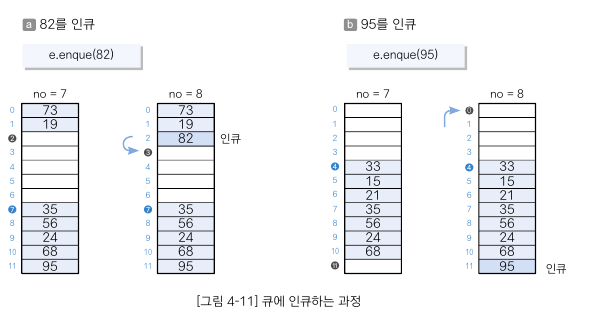

In [2]:
# ## 실습 4-3[B]
# # [A]에 이어서

# def enque(self, x: Any) -> None:
#     """데이터 x를 인큐"""
#     if self.is_full():
#         raise FixedQueue.Full   # 큐가 가득 차 있는 경우 예외 처리 발생
#     self.que[self.rear] = x
#     self.rear += 1
#     self.no += 1
#     if self.rear == self.capacity:
#         self.rear = 0

* 데이터를 꺼내는 함수 deque()함수
  + deque()함수는 큐의 맨 앞부터 데이터를 디큐하여 그 값을 반환한다.
  + 큐가 비어있어 디큐할 수 없는 경우 예외 처리인 FixedQueue.Empty를 내보낸다.

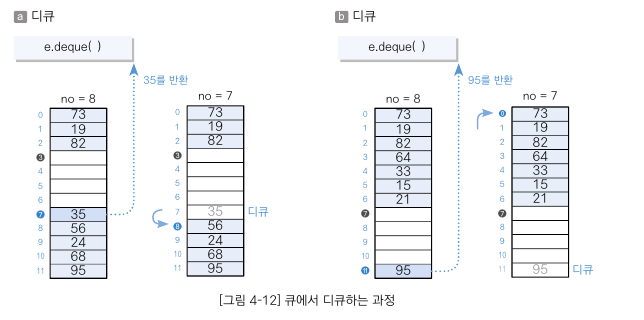

In [ ]:
# ## 실습 4-3[C]
# # [A],[B]에 이어서
# def deque(self) -> Any:
#     """데이터를 디큐"""
#     if self.is_empty:
#         raise FixedQueue.Empty  # 큐가 비어 있는 경우 예외 처리 발생
#     x = self.que[self.front]
#     self.front += 1
#     self.no += 1
#     if self.front == self.capacity:
#         self.front = 0
#     return x

* 데이터를 들여다보는 peek() 함수
  + 맨 앞 데이터, 즉 다음 디큐에서 꺼낼 데이터를 들여다본다.
  + que[front]의 값을 반환할 뿐 데이터를 꺼내지는 않으므로 front, rear, no의 값은 변하지 않는다.
  + 큐가 비어 있을 때는 예외 처리 FixedQueue.Empty를 내보낸다.
* 검색하는 find() 함수
  + 큐의 배열에서 value와 같은 데이터가 포함되어 있는 위치를 알아낸다.
  + 맨 앞쪽으로 선형 검색을 수행한다. 스캔은 배열의 맨 앞 원소가 아니라 큐의 맨 앞 원소(front)부터 시작한다.
  + 따라서 스캔할 때 주목하는 인덱스 diex를 구하는 식은 (i+front)%capacity이다.
  + 검색에 성공하면 찾은 원소의 인덱스를 반환하고 실패하면 -1을 반환한다.
* 데이터 개수를 세는 count()함수
  + 큐에 있는 데이터(value)의 개수를 구하여 반환한다.
* 데이터가 포함되어 있는지를 판단하는 __contains__()함수
  + 큐에 데이터(value)가 들어 있는지를 판단한다. 
  + 들어 있으면 True를, 그렇지 않으면 False를 반환한다.
  + 내부의 count()함수를 호출하여 구현한다.
* 큐의 전체 원소를 삭제하는 clear()함수
  + 현재 큐에 들어있는 모든 데이터를 삭제한다.
    - 인큐와 디큐는 no, front, rear의 값을 바탕으로 수행된다.
    - 그러므로 값을 0으로만 하면 된다(실제 큐 배열 que의 원솟값을 변경할 필요가 없다).
* 큐의 전체 데이터를 출력하는 dump()함수
  + 큐에 들어있는 모든 데이터를 맨 앞부터 맨 끝 쪽으로 순서대로 출력한다.
  + 큐가 비어 있으면 '큐가 비어 있습니다.'를 출력한다.

In [4]:
# ## 실습 4-3[D]
# # 실습 [A],[B],[C]에 이어서
# def peek(self) -> Any:
#     """큐에서 데이터를 피크(맨 앞 데이터를 들여다봄)"""
#     if self.is_empty():
#         raise FixedQueue.Empty             # 큐가 비어있는 경우 예외 처리를 발생
#     return self.que[self.front]

# def find(self, value: Any) -> Any:
#     """큐에서 value를 찾아 인덱스를 반환(없으면 -1을 반환)"""
#     for i in range(self.no):
#         idx = (i + self.front) % self.capacity
#         if self.que[idx] == value:
#             return idx
#     return -1

# def count(self, value: Any) -> bool:
#     """큐에 있는 value의 개수를 반환"""
#     c = 0
#     for i in range(self.no):
#         idx = (i + self.front) % self.capacity
#         if self.que[idx] == value:
#             c += 1
#     return c

# def __contains__(self, value: Any) -> bool:
#     """큐에 value가 있는지 판단"""
#     return self.count(value)

# def clear(self) -> None:
#     """큐의 모든 데이터를 지움"""
#     self.no = self.front = self.rear = 0

# def dump(self) -> None:
#     """모든 데이터를 맨 앞쪽부터 맨 끝 순으로 출력"""
#     if self.is_empty():
#         print('큐가 비어 있습니다.')
#     else:
#         for i in range(self.no):
#             print(self.que[(i + self.front) % self.capacity], end='')
#         print()

보충) 양방향 대기열 덱의 구조

양방향 대기열인 덱(deque)은 맨 앞과 맨 끝 양쪽에서 데이터를 넣고 꺼낼 수 있는 자료구조이다. 파이썬에서는 collections.deque 컨테이너로 제공된다.